In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt         
from sklearn.linear_model import LogisticRegression
%matplotlib inline
# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#loading in data 
#trd= pd.read_csv('/kaggle/input/titanic/train.csv', index_col=0)
#test_data = pd.read_csv('/kaggle/input/titanic/test.csv',index_col=0)
trd= pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
trd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


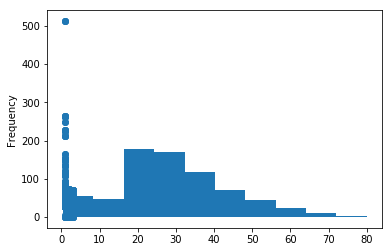

In [3]:
#Exploratory visualizations age
trd.Age.plot(kind='hist')
plt.scatter(trd.Pclass, trd.Fare)
plt.show()

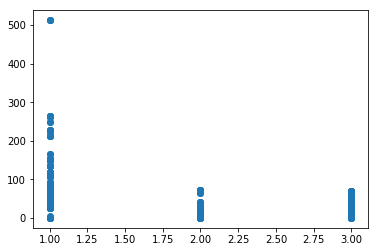

In [4]:
#Exploratory visualizations Pclass vs. Fare
plt.scatter(trd.Pclass, trd.Fare)
plt.show()

In [5]:
#Exploratory visualizations crosstab survive and pclass
pd.crosstab(trd.Survived, trd.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [6]:
trd[(trd.Pclass == 1) & (trd.Age <10)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S


In [7]:
x = pd.Series(np.zeros(len(test_data),dtype='int64'))

In [8]:
temp = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':x, 'Pclass':test_data.Pclass, 'Age':test_data.Age})
temp.head()

,PassengerId,Survived,Pclass,Age
0,892,0,3,34.5
1,893,0,3,47.0
2,894,0,2,62.0
3,895,0,3,27.0
4,896,0,3,22.0


In [9]:
temp =[(temp.Age < 10) & (temp.Pclass == 1)]

In [10]:
temp.loc[(temp.Age<10) & (temp.Pclass == 1),'Survived']= 1

AttributeError: 'list' object has no attribute 'loc'

In [11]:
temp[(temp.Age<10) & (temp.Pclass == 1)]

AttributeError: 'list' object has no attribute 'Age'

In [12]:
sub = pd.DataFrame({'PassengerId':temp.PassengerId, 'Survived':temp.Survived})
sub.head()

AttributeError: 'list' object has no attribute 'PassengerId'

In [13]:
sub[sub.Survived == 1]

NameError: name 'sub' is not defined

In [14]:
sub.to_csv('sub.csv')

NameError: name 'sub' is not defined

In [15]:
final = pd.DataFrame({'PassengerId':sub.PassengerId, 'Survived':sub.Survived}).set_index('PassengerId').to_csv('sub.csv')

NameError: name 'sub' is not defined